# Self-organizing maps

* One of the largest problems in categorization: data is more than three-dimensional. 
* How do we even express large multi-dimensional data sets? 
* One answer: map multi-dimensional vectors into the plane according to their similarity with others. 
* This is often called a *self-organizing map*. 

This code is from: https://machinelearningnepal.com/2018/01/17/online-som/

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches as patches
import matplotlib.lines as mlines

In [2]:
# reading data
input_data = pd.read_csv('Cash_Crop_Nepal.csv')
input_data.head(10)

,Year AD,Year BS,Crop,Area,Production,Yield
0,1984/85,2041/42,OILSEED,127820,84030,657
1,1985/86,2042/43,OILSEED,137920,78390,568
2,1986/87,2043/44,OILSEED,142890,82500,577
3,1987/88,2044/45,OILSEED,151490,94370,623
4,1988/89,2045/46,OILSEED,154860,99190,641
5,1989/90,2046/47,OILSEED,153660,98060,638
6,1990/91,2047/48,OILSEED,156310,92140,589
7,1991/92,2048/49,OILSEED,154570,87840,568
8,1992/93,2049/50,OILSEED,165240,93690,567
9,1993/94,2050/51,OILSEED,177486,107535,606


In [3]:
# shuffling data
agri_data = input_data.iloc[np.random.permutation(len(input_data))]
trunc_data = agri_data[["Area", "Production", "Yield"]]
trunc_data.head(10)

,Area,Production,Yield
78,58126,2103426,36187
17,187820,134950,719
20,187823,141989,756
33,110850,997400,8998
46,7300,5380,737
84,27200,33124,1218
9,177486,107535,606
93,9000,11000,1222
31,97634,838932,8593
86,19840,23452,1182


In [4]:
# normalizing data
trunc_data = trunc_data / trunc_data.max()
trunc_data.iloc[:10,:]

,Area,Production,Yield
78,0.305237,0.885242,0.899794
17,0.986299,0.056795,0.017878
20,0.986315,0.059757,0.018798
33,0.582107,0.419763,0.223736
46,0.038334,0.002264,0.018326
84,0.142835,0.013940,0.030286
9,0.932032,0.045257,0.015068
93,0.047262,0.004629,0.030385
31,0.512706,0.353071,0.213666
86,0.104186,0.009870,0.029391


In [5]:
# This code is taken from https://machinelearningnepal.com/2018/01/17/online-som/
from SOM import SOM

In [6]:
# To see the code, run this cell 
%more SOM.py

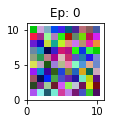

In [17]:
#from com.machinelearningnepal.som.online_som import SOM
# som = SOM(x_size, y_size, num_features)
agri_som = SOM(10,10,3)
# Initial weights
init_fig = plt.figure(figsize=(8,10))
agri_som.show_plot(init_fig, 1, 0)

SOM training epoches 20
neighborhood radius  7.943282347242815
learning rate  0.009048374180359595
-------------------------------------
SOM training epoches 40
neighborhood radius  6.3095734448019325
learning rate  0.008187307530779819
-------------------------------------
SOM training epoches 60
neighborhood radius  5.011872336272722
learning rate  0.007408182206817179
-------------------------------------
SOM training epoches 80
neighborhood radius  3.981071705534972
learning rate  0.006703200460356393
-------------------------------------
SOM training epoches 100
neighborhood radius  3.162277660168379
learning rate  0.006065306597126334
-------------------------------------
SOM training epoches 120
neighborhood radius  2.51188643150958
learning rate  0.005488116360940265
-------------------------------------
SOM training epoches 140
neighborhood radius  1.9952623149688797
learning rate  0.004965853037914096
-------------------------------------
SOM training epoches 160
neighborhood

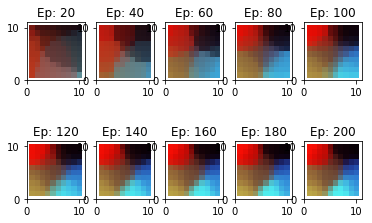

In [18]:
agri_som.train(trunc_data.values,
          num_epochs=200,
          init_learning_rate=0.01
          )

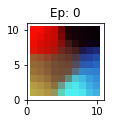

In [23]:
final_fig = plt.figure(figsize=(8,10))
agri_som.show_plot(final_fig, 1, 0)

In [9]:
def predict(df):
    bmu, bmu_idx = agri_som.find_bmu(df.values)
    df['bmu'] = bmu
    df['bmu_idx'] = bmu_idx
    return df
clustered_df = trunc_data.apply(predict, axis=1)
clustered_df.iloc[0:20]

,Area,Production,Yield,bmu,bmu_idx
78,0.305237,0.885242,0.899794,"[[0.2878302491318943, 0.8614970879462042, 0.92...","[4, 0]"
17,0.986299,0.056795,0.017878,"[[0.9197360038927533, 0.04764070450755773, 0.0...","[0, 4]"
20,0.986315,0.059757,0.018798,"[[0.9197360038927533, 0.04764070450755773, 0.0...","[0, 4]"
33,0.582107,0.419763,0.223736,"[[0.5287948089633123, 0.371896651135937, 0.215...","[1, 1]"
46,0.038334,0.002264,0.018326,"[[0.04455920195977767, 0.0038516463562942474, ...","[4, 4]"
84,0.142835,0.013940,0.030286,"[[0.10779441814460924, 0.0367615385131429, 0.0...","[3, 3]"
9,0.932032,0.045257,0.015068,"[[0.9197360038927533, 0.04764070450755773, 0.0...","[0, 4]"
93,0.047262,0.004629,0.030385,"[[0.04455920195977767, 0.0038516463562942474, ...","[4, 4]"
31,0.512706,0.353071,0.213666,"[[0.5287948089633123, 0.371896651135937, 0.215...","[1, 1]"
86,0.104186,0.009870,0.029391,"[[0.056487528880947296, 0.005242595795513165, ...","[3, 4]"


In [10]:
joined_df = agri_data.join(clustered_df, rsuffix="_norm")
joined_df[0:20]

,Year AD,Year BS,Crop,Area,Production,Yield,Area_norm,Production_norm,Yield_norm,bmu,bmu_idx
78,1999/2000,2056/57,SUGARCANE,58126,2103426,36187,0.305237,0.885242,0.899794,"[[0.2878302491318943, 0.8614970879462042, 0.92...","[4, 0]"
17,2001/2002,2058/59,OILSEED,187820,134950,719,0.986299,0.056795,0.017878,"[[0.9197360038927533, 0.04764070450755773, 0.0...","[0, 4]"
20,2004/2005,2061/62,OILSEED,187823,141989,756,0.986315,0.059757,0.018798,"[[0.9197360038927533, 0.04764070450755773, 0.0...","[0, 4]"
33,1996/97,2053/54,POTATO,110850,997400,8998,0.582107,0.419763,0.223736,"[[0.5287948089633123, 0.371896651135937, 0.215...","[1, 1]"
46,1988/89,2045/46,TOBACCO,7300,5380,737,0.038334,0.002264,0.018326,"[[0.04455920195977767, 0.0038516463562942474, ...","[4, 4]"
84,1984/85,2041/42,JUTE,27200,33124,1218,0.142835,0.013940,0.030286,"[[0.10779441814460924, 0.0367615385131429, 0.0...","[3, 3]"
9,1993/94,2050/51,OILSEED,177486,107535,606,0.932032,0.045257,0.015068,"[[0.9197360038927533, 0.04764070450755773, 0.0...","[0, 4]"
93,1993/94,2050/51,JUTE,9000,11000,1222,0.047262,0.004629,0.030385,"[[0.04455920195977767, 0.0038516463562942474, ...","[4, 4]"
31,1994/95,2051/52,POTATO,97634,838932,8593,0.512706,0.353071,0.213666,"[[0.5287948089633123, 0.371896651135937, 0.215...","[1, 1]"
86,1986/87,2043/44,JUTE,19840,23452,1182,0.104186,0.009870,0.029391,"[[0.056487528880947296, 0.005242595795513165, ...","[3, 4]"


In [11]:
#Finally, we can use all of this code to make some predictions for future values.
#There are some cool graphing features here that we havn't used before, so make sure to look at those.

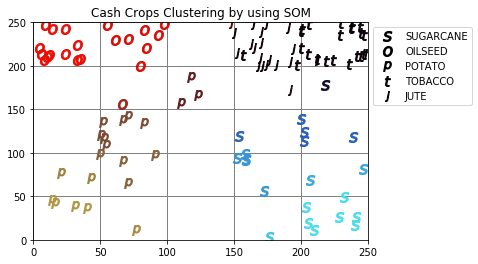

In [12]:
from matplotlib import pyplot as plt
from matplotlib import patches as patches
import matplotlib.lines as mlines

fig = plt.figure()
# setup axes
ax = fig.add_subplot(111)
scale = 50
ax.set_xlim((0, agri_som.net.shape[0]*scale))
ax.set_ylim((0, agri_som.net.shape[1]*scale))
ax.set_title("Cash Crops Clustering by using SOM")

for x in range(0, agri_som.net.shape[0]):
    for y in range(0, agri_som.net.shape[1]):
        ax.add_patch(patches.Rectangle((x*scale, y*scale), scale, scale,
                     facecolor='white',
                     edgecolor='grey'))
legend_map = {}
        
for index, row in joined_df.iterrows():
    x_cor = row['bmu_idx'][0] * scale
    y_cor = row['bmu_idx'][1] * scale
    x_cor = np.random.randint(x_cor, x_cor + scale)
    y_cor = np.random.randint(y_cor, y_cor + scale)
    color = row['bmu'][0]
    marker = "$\\ " + row['Crop'][0]+"$"
    marker = marker.lower()
    ax.plot(x_cor, y_cor, color=color, marker=marker, markersize=10)
    label = row['Crop']
    if not label in legend_map:
        legend_map[label] =  mlines.Line2D([], [], color='black', marker=marker, linestyle='None',
                          markersize=10, label=label)
plt.legend(handles=list(legend_map.values()), bbox_to_anchor=(1, 1))
plt.show()